In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
data = pd.read_csv('/home/yellow/Загрузки/nba-players-stats/player_data.csv')
players = pd.read_csv('/home/yellow/Загрузки/nba-players-stats/Players.csv')
seasons = pd.read_csv('/home/yellow/Загрузки/nba-players-stats/Seasons_Stats.csv')

In [3]:
data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# График первый

In [6]:
stats=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [7]:
stats['position']=list(set(list(data['position'])))
stats['mean']=stats['position'].apply(lambda x: data[data['position']==x].mean(axis=None, skipna=None)['weight'])
stats['max']=stats['position'].apply(lambda x: data[data['position']==x].max(axis=None, skipna=None)['weight'])
stats['min']=stats['position'].apply(lambda x: data[data['position']==x].min(axis=None, skipna=None)['weight'])

In [8]:
stats=stats.sort_values(by=['mean'])

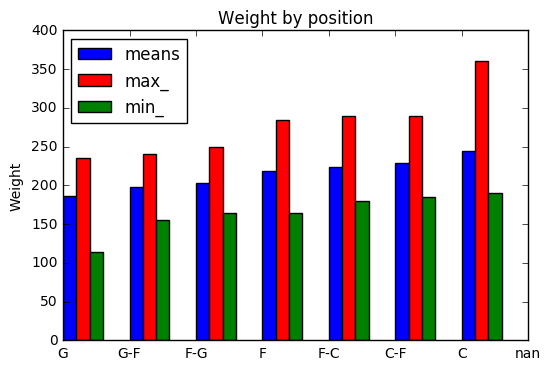

In [9]:
n_groups = len(stats['mean'])
means = list(stats['mean'])
max_ = list(stats['max'])
min_ = list(stats['min'])
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 1

rects1 = ax.bar(index, means, bar_width,
                alpha=opacity, color='b',
                label='means')

rects2 = ax.bar(index+bar_width, max_, bar_width,
                alpha=opacity, color='r',
                label='max_')

rects3 = ax.bar(index+2*bar_width, min_, bar_width,
                alpha=opacity, color='g',
                label='min_')

ax.set_ylabel('Weight')
ax.set_title('Weight by position')
ax.set_xticks(index)
ax.set_xticklabels(list(stats['position']))
ax.legend(loc='upper left')


plt.show(fig)

На графике отображено распределние среднего, максимального и минимального веса футболистов в каждой группе. Мы можем говорить о том, что вес некоторым образом определяет группу баскетболиста: например самые тяжелые баскетболисты в группе С, самые легкие в группе G. В группах G,G-F,F-G баскетболисты весят примерно одинаково, как и в группах F, F-C, C-F. Группа С резко отличается от других максимумом веса. Так же резко отличается группа G минимумом.

# График второй

In [10]:
stats_1=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
stats_1['birth_state']=list(set(list(players['birth_state'])))
stats_1['count']=stats_1['birth_state'].apply(lambda x: players[players['birth_state']==x].count()['Player'])
stats_1=stats_1.sort_values(by=['count'],ascending=False)
stats_1=stats_1.head(5)

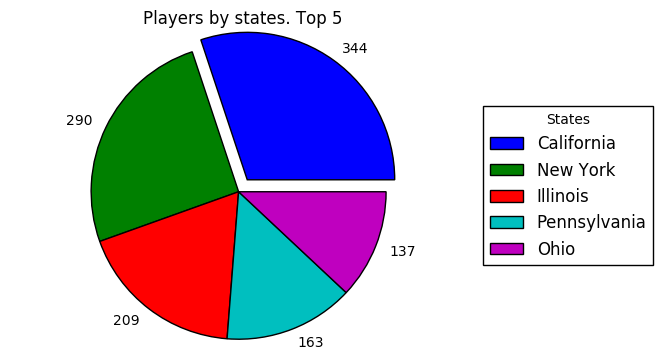

In [11]:
labels = stats_1['birth_state']
sizes = stats_1['count']
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
wedges, texts = ax1.pie(sizes, explode=explode, labels=sizes)
ax1.axis('equal')
ax1.set_title('Players by states. Top 5')
ax1.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

На графике выведены топ 5 штатов по количеству рожденных в нем баскетболистов. Видим, что Калифорнию заслуженно можно назвать кузницей американских баскетболистов.

# График третий

In [12]:
#Найдем баскетболистов, которые забили больше всего голов за все игры
stats_2=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
stats_2['player']=list(set(list(seasons['Player'])))
stats_2['goals']=stats_2['player'].apply(lambda x: seasons[seasons['Player']==x].sum()['G'])
stats_2['min']=stats_2['player'].apply(lambda x: seasons[seasons['Player']==x].min()['Year'])
stats_2['max']=stats_2['player'].apply(lambda x: seasons[seasons['Player']==x].max()['Year'])
stats_2=stats_2.sort_values(by=['goals'],ascending=False)
stats_2=stats_2.head(3)

In [13]:
top_players=stats_2['player']

In [14]:
years=range(int(stats_2['min'].min()),int(stats_2['max'].max())+1)

In [15]:
games_0=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
games_1=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
games_2=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [16]:
seasons_0=seasons[seasons['Player']==list(top_players)[0]]
seasons_1=seasons[seasons['Player']==list(top_players)[1]]
seasons_2=seasons[seasons['Player']==list(top_players)[2]]

In [17]:
games_0['year']=years
games_1['year']=years
games_2['year']=years
games_0['player']=list(top_players)[0]
games_1['player']=list(top_players)[1]
games_2['player']=list(top_players)[2]

In [18]:
games_0['goals']=games_0['year'].apply(lambda x: seasons_0[seasons_0['Year']==x].sum()['G'])
games_1['goals']=games_1['year'].apply(lambda x: seasons_1[seasons_1['Year']==x].sum()['G'])
games_2['goals']=games_2['year'].apply(lambda x: seasons_2[seasons_2['Year']==x].sum()['G'])

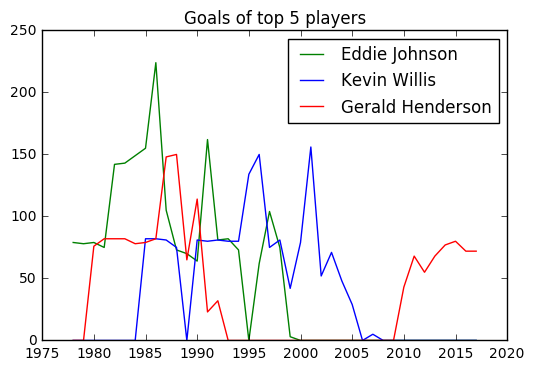

In [19]:
plt.plot(games_0['year'], games_0['goals'], '-g', label=list(top_players)[0])  # solid green
plt.plot(games_1['year'], games_1['goals'], '-b', label=list(top_players)[1])  # solid green
plt.plot(games_2['year'], games_2['goals'], '-r', label=list(top_players)[2])  # solid green
plt.legend()
plt.title('Goals of top 5 players')
plt.show()

На графике мы видим, как менялось кол-во забитых голов у трех самых результативных игроков. Пик карьеры зеленого пришелся на 1985 год, в который он забил какое-то невероятное число голов. На пару лет красный вырвался вперед, однако уже в 1992 зеленый вернул себе звание самого крутого игорока. Сразу после второго пика карьера зеленого пошла на спад, его заменил синий. Синий держался на пьедестале до 2005 года. На сегодняшний момент карьеру продолжает только красный.

# График четвертый

In [20]:
stats_3=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [21]:
stats_3['height']=players['height'][0:200]
stats_3['weight']=players['weight'][0:200]

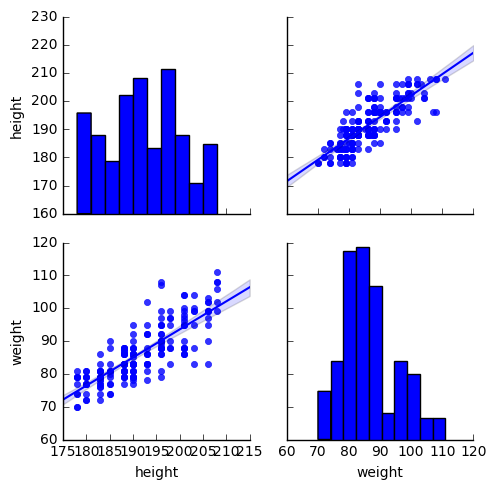

In [22]:
sns.pairplot(stats_3,kind="reg")
plt.show()

Можно заметить, что вес с общем-то распределен нормально, а вот рост нет. Между ростом и весом игроков наблюдается линейная зависимость, выбросов почти нет.

# График пятый 

In [23]:
# Воспользуемся данными графика 3
games_0['pf']=games_0['year'].apply(lambda x: seasons_0[seasons_0['Year']==x].sum()['PF'])
games_0['ptc']=games_0['year'].apply(lambda x: seasons_0[seasons_0['Year']==x].sum()['PTS'])
games_0['games']=games_0['year'].apply(lambda x: seasons_0[seasons_0['Year']==x].count()['Year'])

In [24]:
games_0=games_0[games_0['games']>0]

In [25]:
games_0

,year,player,goals,pf,ptc,games
0,1978,Eddie Johnson,79.0,232.0,828.0,1
1,1979,Eddie Johnson,78.0,241.0,1245.0,1
2,1980,Eddie Johnson,79.0,216.0,1465.0,1
3,1981,Eddie Johnson,75.0,188.0,1431.0,1
4,1982,Eddie Johnson,142.0,398.0,1901.0,2
5,1983,Eddie Johnson,143.0,397.0,2599.0,2
6,1984,Eddie Johnson,149.0,421.0,2680.0,2
7,1985,Eddie Johnson,155.0,421.0,3069.0,2
8,1986,Eddie Johnson,224.0,493.0,2948.0,4
9,1987,Eddie Johnson,105.0,254.0,1733.0,2


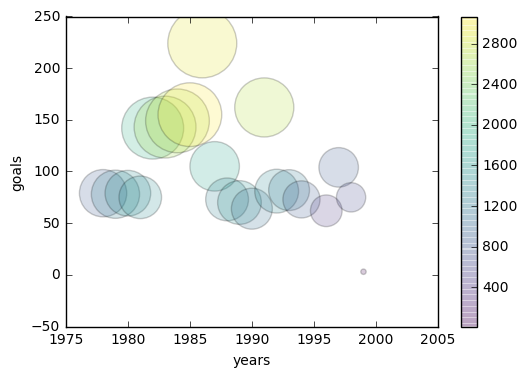

In [26]:
plt.scatter(games_0['year'], games_0['goals'], alpha=0.2,
             s=games_0['pf']*5, c=games_0['ptc'], cmap='viridis')
plt.xlabel('years')
plt.ylabel('goals');
plt.colorbar()
plt.show()

Исследуем историю игр одного игрока (самого результативного). Цвет-PTS (кол-во набранных очков), размер -PF (кол-во замечаний). В начале карьеры игрок набирал мало очков, но и замечаний было не много. Примерно в 1985 году кол-во замечаний возросло,как раз это время было наиболее успешное для игрока - 2800 очков за год. К концу карьеры уменьшилось кол-во забиваемых голов, очков, и игрок перестал получать замечания.